# Credit Card Fraud Detection

### What is Fraud Detection

Fraud detection is a problem that applicable in many industries including banks and financial sectors, insurance, government agencies and law enforcement. On the other hand, its becoming billion-dollar business ([2018 PWC](https://www.pwc.com/gx/en/forensics/global-economic-crime-and-fraud-survey-2018.pdf)), and it is increasing every year.

#### Some common Frauds:
- Credit Card Fraud
- Tax Fraud
- Fraud in Supply Chains, Retail networks, Purchase Department
- Fraud in Insurances
- Fraud in Healthcare

### Challenges in detecting Frauds
Information technology, business reengineering, reorganization or downsizing may weaken or eliminate control, while new information systems may present additional opportunities to commit fraud.

#### Traditional programming techniques
- Frequency between unsuccessful tries
- Registered customer's location like country, postcode or address
- 3D code in credit card payment
- other unusual behaviour that captured by human

#### Machine Learning techniques in Fraud Detection
One of the common technique to detect fraud in credit card payment is Anomaly Detection that used to identify unusual patterns that do not conform to expected behavior, called outliers. 

#### Other common usages of Anomaly Detection:
- Manufactoring
- Data Center 
- Airplane engine
- Website

### Some commong Machine Learning-based approaches for Anomaly Detection

- Density-Based Anomaly Detection (example: k-NN, LOF)
- Clustering-Based Anomaly Detection
- Support Vector Machine-Based Anomaly Detection
- Isolation Forest Anomaly Detection Algorithm


### Outlier vs Anamoly
Outlier: a value that you predictably find in your data that indicates your model does not work properly

Anomaly: a value that against all odds you find in your data that indicates your model does work properly

### Dataset
https://www.kaggle.com/mlg-ulb/creditcardfraud

Dataset is transformed Principal Component Analysis (PCA) which is commonly used:
- Dimensionality reduction algorithm
- Speed-up Machine Learning algorithms

#### Observation
- some features (V1, V2, V3, ... ,V28) transformed to PCA and Time, Amount features not transformed.
- target is Class (1-Fraud, 0-NonFraud)

### Modeling in Anomaly Detection
- ***Anomaly Detection using Gaussian Distribution***  
  One of the main purposes of working on Capstone project is learning. So, personally, I am interested in Anomaly Detection technique taught by ***Andrew Ng***. It is simple, and easy to understand what Anomaly Detection is, and I am hoping that it will be my base knowledge to understand other ML algorithms to detect Anomaly. if you were interested in this course, please click [here](https://www.coursera.org/learn/machine-learning)
 
 ***For example:***
![alt text](../docs/images/anomaly_detection6.png "Anomaly Detection")

  ***Source***: https://www.ritchieng.com/machine-learning-anomaly-detection/
  
  
- ISOlation forest

#### Other good Anomaly Detection algorithms

- SVM
- Clustering

In [178]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score 
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/creditcard.csv', sep=',')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Principal Component Analysis (PCA)

This dataset may transformed by PCA to hide some customer related information. However, there are many other purpose of PCA transformation that includes reduce dimension for visualistion

Here, going to try what it means:

In [5]:
features = df.iloc[:,1:29].columns
x = df.loc[:, features].values

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.head(5)

,principal component 1,principal component 2
0,1.359834,0.073669
1,-1.191896,-0.265946
2,1.358326,1.341423
3,0.966284,0.185778
4,1.158230,-0.878025


In [7]:
finalDf = pd.concat([principalDf, df[['Time','Amount','Class']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Time,Amount,Class
0,1.359834,0.073669,0.0,149.62,0
1,-1.191896,-0.265946,0.0,2.69,0
2,1.358326,1.341423,1.0,378.66,0
3,0.966284,0.185778,1.0,123.50,0
4,1.158230,-0.878025,2.0,69.99,0


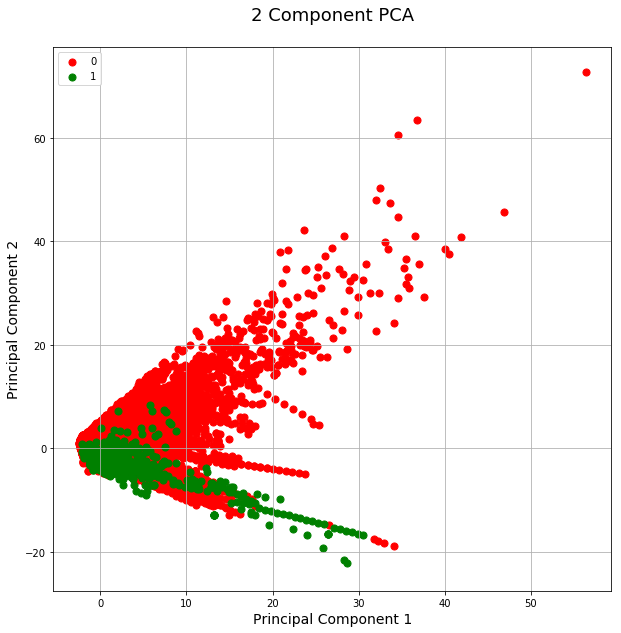

In [8]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 14)
ax.set_ylabel('Principal Component 2', fontsize = 14)
ax.set_title('2 Component PCA\n', fontsize = 18)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [9]:
pca.explained_variance_ratio_

array([0.12483757, 0.08872943])

## Exploratory Data Analysis

In [10]:
df.shape

(284807, 31)

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
df.isnull().values.any()

False

In [14]:
print(df['Class'].value_counts()[0],'NonFraud transactions in total') 
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,4), '% of the dataset \n')
print(df['Class'].value_counts()[1],'Fraud transactions in total') 
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,4), '% of the dataset') 

284315 NonFraud transactions in total
No Frauds 99.8273 % of the dataset 

492 Fraud transactions in total
Frauds 0.1727 % of the dataset


## Anomaly Detection vs Supervised Learning
Based on this initial EDA, this dataset does not have any null values and highly imbalance. According to Andrew NG, Anomaly Detection is best for umbalance dataset and supervised learning is better if dataset balanced. See the picture below

#### 99.8273% of total transaction is Non Fraud
#### 0.1727% of total transaction is Fraud

![alt text](../docs/images/anomaly-vs-supervised.png "Anomaly Detection vs Supervised Learning")

Text(0.5,0,'Non Frad vs Fraud')

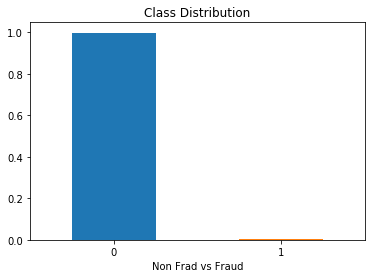

In [15]:
count_classes = pd.value_counts(df['Class'], sort = True, normalize=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), ['0','1'])
plt.xlabel("Non Frad vs Fraud")

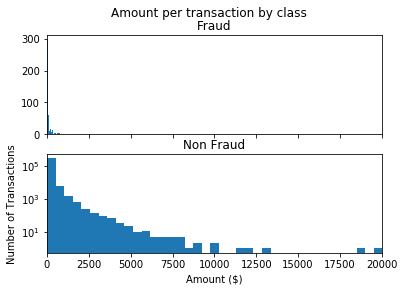

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(df[df['Class']==1].Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(df[df['Class']==0].Amount, bins = bins)
ax2.set_title('Non Fraud')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

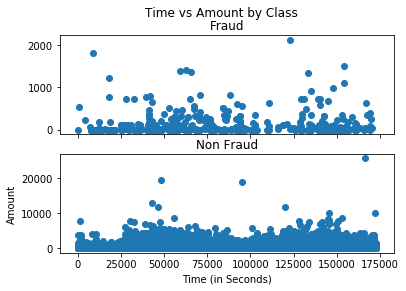

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time vs Amount by Class')

ax1.scatter(df[df['Class']==1].Time, df[df['Class']==1].Amount)
ax1.set_title('Fraud')

ax2.scatter(df[df['Class']==0].Time, df[df['Class']==0].Amount)
ax2.set_title('Non Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

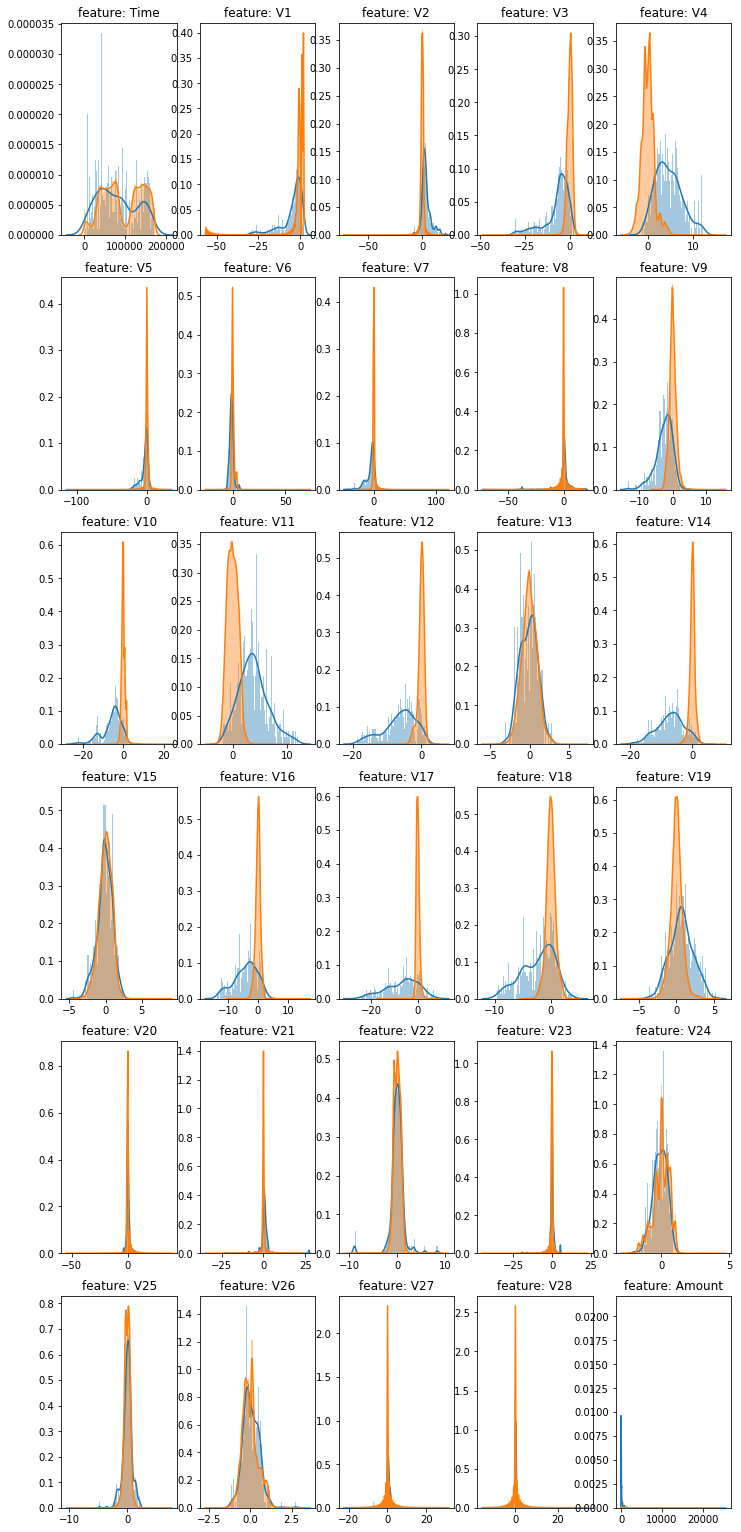

In [18]:
plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 5)
for i, cn in enumerate(df.iloc[:,0:30]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=80)
    sns.distplot(df[cn][df.Class == 0], bins=80)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

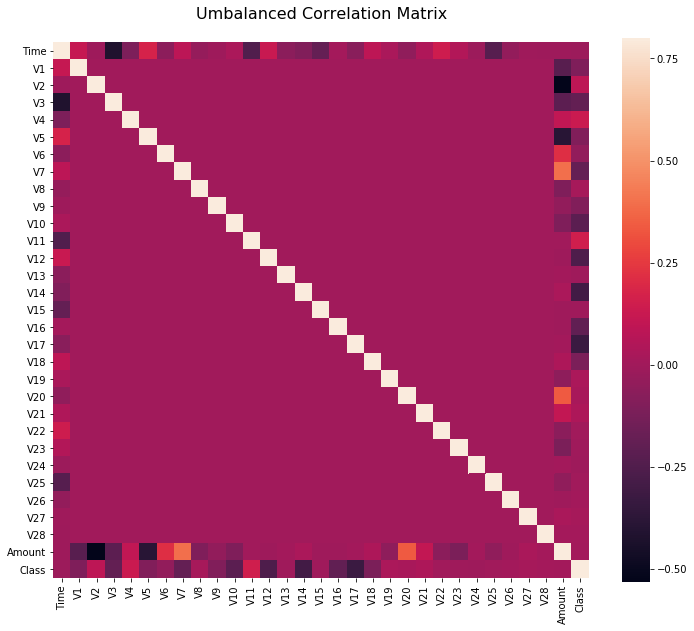

In [19]:
f, ax = plt.subplots(1, 1, figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
ax.set_title("Umbalanced Correlation Matrix\n", fontsize=16)
plt.show()

## Modelling

### 1. Anomaly Detection using Gaussian Distribution
    - According to Andrew Ng, we have to estimate parameters first. (the formulas described above!)
    - Find best Epsilon (based on accuracy)

In [20]:
def estimateGaussian(df):
    """
     This function estimates the parameters of a Gaussian distribution
    """
    mu = np.mean(df, axis=0)
    sigma = np.cov(df.T) # convariance
    return mu, sigma

def multivariateGaussian(dataset, mu, sigma):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    p = multivariate_normal(mean=mu, cov=sigma, allow_singular=True)
    return p.pdf(dataset)

In [166]:
def selectThreshold(probs, gt):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    
    recall_array = []
    precision_array = []
    f1_array = []
    f1_idx = 0
    idx = 0
    
    # we can change step size manually to improve model's accuracy 
    step = (max(probs) - min(probs))/500
    epsilons = np.arange(probs.min(), probs.max(), step)
    
    # for demistration purposes, going to selected 4 Epsilons, 
    # In Production, we should use previous method, to find out the Best Epsilon
    epsilons = (0.0000e+00, 1.0527717316e-70, 1.0527717316e-50, 1.0527717316e-24)

    # check each probability to choose best epsilon
    for ep in epsilons:
        predictions = (probs < ep)
        f1 = f1_score(gt, predictions, average = "binary")
        recall = recall_score(gt, predictions, average = "binary")
        precision = precision_score(gt, predictions, average = "binary")
        
        # collecting in array for visualisation
        f1_array.append(f1)
        recall_array.append(recall)
        precision_array.append(precision)
        
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = ep
            best_recall = recall
            best_precision = precision
            # saving location of best value for visualisation
            f1_idx = idx
        idx+=1
    
    
    print('Calculated based on {} Epsilons'.format(len(epsilons)))
    print('Best epsilon found using cross-validation: {} \n'.format(best_epsilon))
    print('Best F1 on Cross Validation: {}'.format(best_f1))
    print('Best Recall Score: {}'.format(best_recall))
    print('Best Precision Score: {} \n'.format(best_precision))

    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 1, 0.5])
    plt.plot(f1_array[(0 if f1_idx-4 <= 0 else f1_idx-4):f1_idx+5] ,"ro")
    plt.plot(f1_array[(0 if f1_idx-4 <= 0 else f1_idx-4):f1_idx+5])
    ax.set_xticks(range(10))
    ax.set_xticklabels(epsilons[(0 if f1_idx-4 <= 0 else f1_idx-4):f1_idx+5], rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0, 1.0))
    ax.set_title('F1 score vs Epsilon value')
    ax.annotate('Best F1 Score', xy=(best_epsilon, best_f1), xytext=(best_epsilon, best_f1))
    plt.xlabel("Epsilon value") 
    plt.ylabel("F1 Score") 
    plt.show()
    
    return best_f1, best_epsilon

In [167]:
df_v1 = df[df["Class"] == 1]
df_v0 = df[df["Class"] == 0]

In [168]:
# Splitting nonFraid dataset into training: 60%, validation: 20%, testing: 20%
df_train, df_cv_v0, df_test_v0 = np.split(df_v0.sample(frac=1), [int(.6*len(df_v0)), int(.8*len(df_v0))])

# Splitting Fraid dataset into validation: 50%, testing: 50%
df_cv_v1, df_test_v1 = np.split(df_v1.sample(frac=1), [int(.5*len(df_v1))])

df_cv = pd.concat([df_cv_v0,df_cv_v1],axis=0)
df_test = pd.concat([df_test_v0,df_test_v1],axis=0)

In [169]:
print('Training Dataset                :', df_train['Class'].value_counts()[0])
print('Validation Dataset (nonFraud)   :', df_cv['Class'].value_counts()[0])
print('Validation Dataset (Fraud)      :', df_cv['Class'].value_counts()[1])
print('Testing Dataset (nonFraud)      :', df_test['Class'].value_counts()[0])
print('Testing Dataset (Fraud)         :', df_test['Class'].value_counts()[1])

Training Dataset                : 170589
Validation Dataset (nonFraud)   : 56863
Validation Dataset (Fraud)      : 246
Testing Dataset (nonFraud)      : 56863
Testing Dataset (Fraud)         : 246


In [170]:
df_cv_Y = df_cv["Class"]
df_test_Y = df_test["Class"]

df_train.drop(labels = ["Class"], axis = 1, inplace = True)
df_cv.drop(labels = ["Class"], axis = 1, inplace = True)
df_test.drop(labels = ["Class"], axis = 1, inplace = True)

In [171]:
mu, sigma = estimateGaussian(df_train)
p = multivariateGaussian(df_train, mu, sigma)
p_cv = multivariateGaussian(df_cv, mu, sigma)
p_test = multivariateGaussian(df_test, mu, sigma)

Calculated based on 4 Epsilons
Best epsilon found using cross-validation: 1.0527717316e-50 

Best F1 on Cross Validation: 0.17076023391812867
Best Recall Score: 0.2967479674796748
Best Precision Score: 0.11986863711001643 



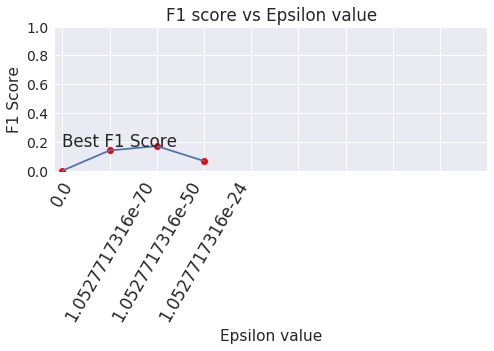

In [172]:
best_f1, ep = selectThreshold(p_cv, df_cv_Y)

In [173]:
predictions = (p_test < ep)
recall = recall_score(df_test_Y, predictions, average = "binary")    
precision = precision_score(df_test_Y, predictions, average = "binary")
F1 = f1_score(df_test_Y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score {}'.format(F1))
print ('Best Recall Score {}'.format(recall))
print ('Best Precision Score {}'.format(precision))

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.19866071428571427
Best Recall Score 0.3617886178861789
Best Precision Score 0.13692307692307693


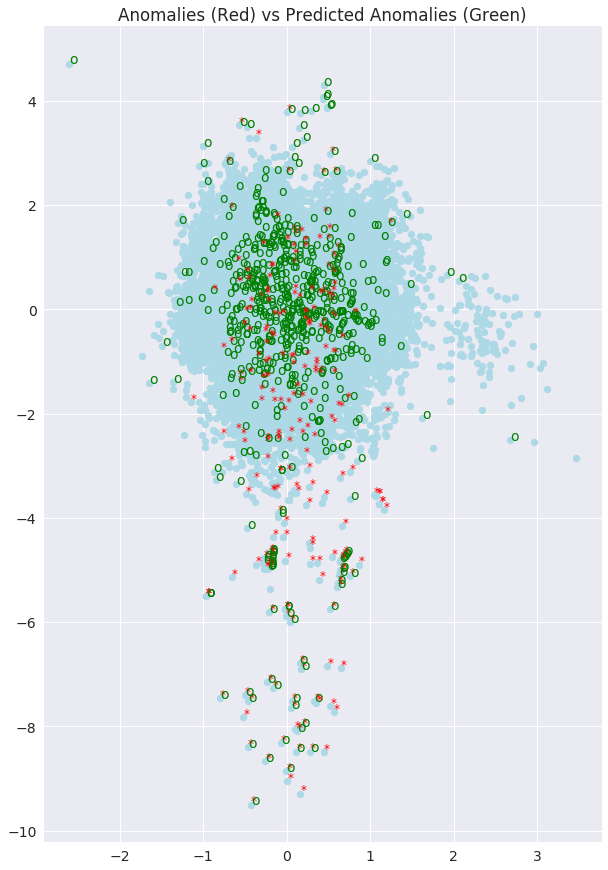

In [176]:
# Randomly choose V26, V18 features to show sample scatter plot, because based on previous feature analysis in EDA,
# these features are the most valid in terms of Gaussian Distribution 

fig, ax = plt.subplots(figsize=(10, 15))
ax.scatter(df_test['V26'], df_test['V18'], marker="o", color="lightBlue")
ax.set_title('Anomalies (Red) vs Predicted Anomalies (Green)')
for i, idx in enumerate(df_test['V26'].index):
    if df_test_Y.loc[idx] == 1:
        ax.annotate('*', (df_test['V26'].loc[idx], df_test['V18'].loc[idx]), fontsize=12,color='Red')
    if predictions[i] == True:
        ax.annotate('o', (df_test['V26'].loc[idx], df_test['V18'].loc[idx]), fontsize=14,color='Green')

### Improving the model
 - Feature Importance

In [30]:
rc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rc.fit(df.iloc[:,0:30], df.iloc[:,30]);

In [31]:
x, y = (list(x) for x in zip(*sorted(zip(rc.feature_importances_, df.iloc[:,0:30].columns), 
                                                            reverse = False)))

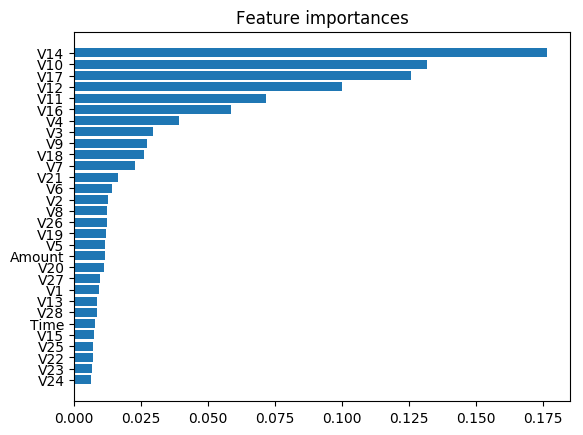

In [32]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(y, x)
ax.set_title('Feature importances')
plt.show()

In [33]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [34]:
important_features = []
for name, importance in zip(df.iloc[:,0:30].columns, rc.feature_importances_):
    # can choose a number to determine how important these features are
    if importance > 0.020 :
        important_features.append(name)

important_features

['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

In [35]:
df[important_features].head()

,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,2.536347,1.378155,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.166480,0.448154,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,1.773209,0.379780,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,1.792993,-0.863291,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,1.548718,0.403034,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


In [36]:
df_train_imp = df_train[important_features]
df_cv_imp = df_cv[important_features]
df_test_imp = df_test[important_features]

In [37]:
mu, sigma = estimateGaussian(df_train_imp)
p = multivariateGaussian(df_train_imp, mu, sigma)
p_cv = multivariateGaussian(df_cv_imp, mu, sigma)
p_test = multivariateGaussian(df_test_imp, mu, sigma)

Calculated based on 500 Epsilons
Best epsilon found using cross-validation: 6.31921228831725e-08 

Best F1 on Cross Validation: 0.03805668016194332
Best Recall Score: 0.9552845528455285
Best Precision Score: 0.019415069398545936 



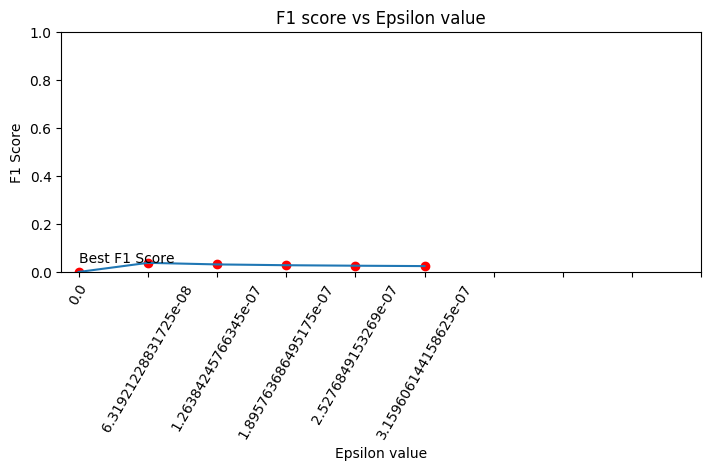

In [38]:
best_f1, ep = selectThreshold(p_cv, df_cv_Y)

In [39]:
predictions = (p_test < ep)
recall = recall_score(df_test_Y, predictions, average = "binary")    
precision = precision_score(df_test_Y, predictions, average = "binary")
F1 = f1_score(df_test_Y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test Dataset')
print ('Best F1 Score {}'.format(F1))
print ('Best Recall Score {}'.format(recall))
print ('Best Precision Score {}'.format(precision))

F1 score , Recall and Precision for Test Dataset
Best F1 Score 0.03563366655917446
Best Recall Score 0.8983739837398373
Best Precision Score 0.01817733179799309


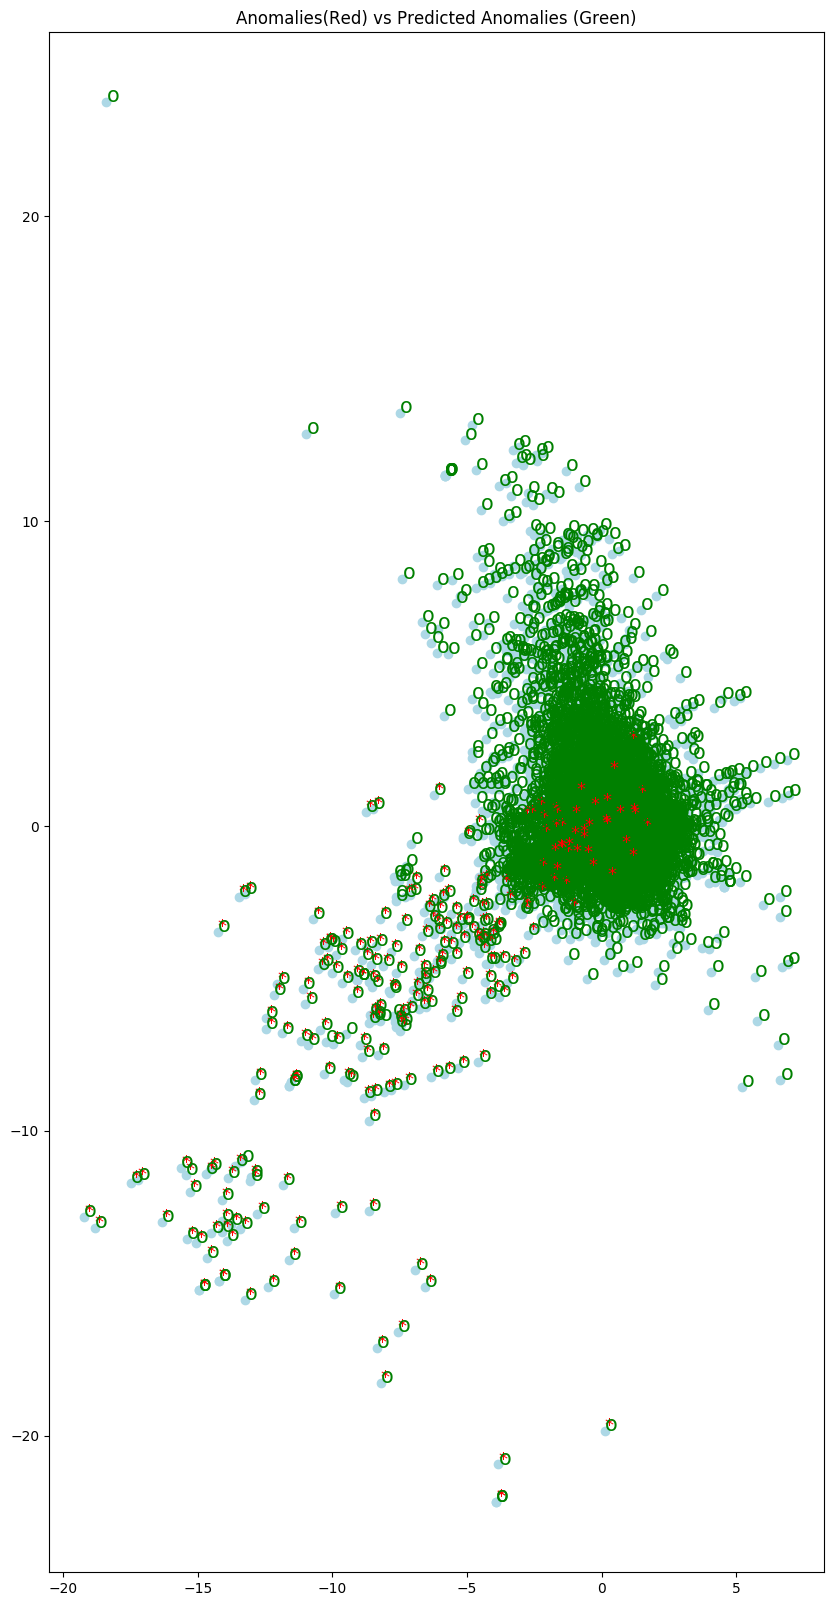

In [40]:
# Randomly choose V14, V10 features to show sample scatter plot, because I assume 
# that V14 and V10 maybe strong and important features

fig, ax = plt.subplots(figsize=(10, 20))
ax.scatter(df_test['V14'], df_test['V10'], marker="o", color="lightBlue")
ax.set_title('Anomalies(Red) vs Predicted Anomalies (Green)')
for i, txt in enumerate(df_test['V14'].index):
    if df_test_Y.loc[txt] == 1:
        ax.annotate('*', (df_test['V14'].loc[txt], df_test['V10'].loc[txt]), fontsize=13, color='Red')
    if predictions[i] == True:
        ax.annotate('o', (df_test['V14'].loc[txt], df_test['V10'].loc[txt]), fontsize=15, color='Green')

Finally, let's import some model scoring libraries. Since, we are dealing with a heavily imbalanced dataset, F1 Score is used as a proxy for model performance.

### IsolationForest Model
unsupervised learning
Isolation Forest,One class SVM and LSTM

In [106]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [107]:
model = IsolationForest(n_estimators=100, max_samples= 256 , contamination=0.2, \
                        max_features=1, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [108]:
model.fit(df_train)

IsolationForest(bootstrap=False, contamination=0.2, max_features=1,
        max_samples=256, n_estimators=100, n_jobs=-1, random_state=42,
        verbose=0)

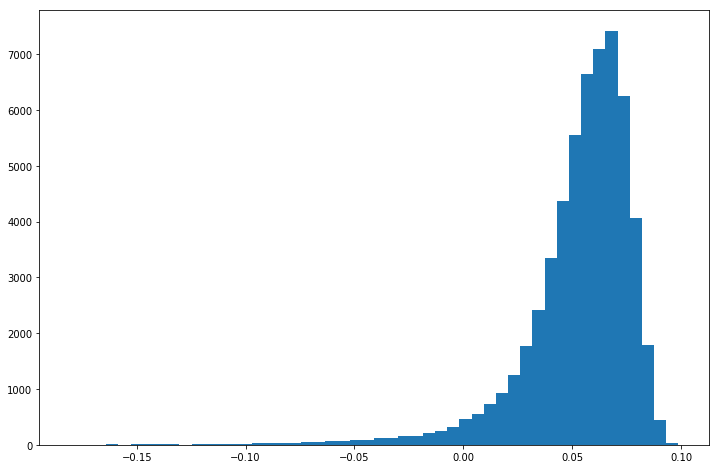

In [127]:
cv_score = model.decision_function(df_cv)
plt.figure(figsize=(12, 8))
plt.hist(cv_score, bins=50);

In [161]:
pred_cv=cv_score.copy()
pred_cv=1-pred_cv
pred_class=pred_cv.copy()
pred_class[pred_cv>=np.percentile(pred_cv,95)]=1
pred_class[pred_cv<np.percentile(pred_cv,95)]=0

print("Validation AUC: {:.1%}".format(roc_auc_score(df_cv_Y, pred_class)))

Validation AUC: 90.6%


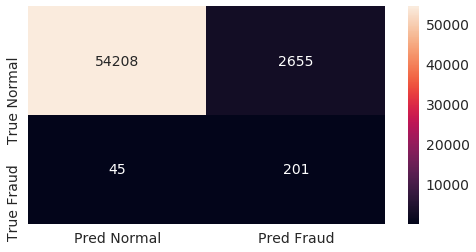

In [163]:
prediction=test_score.copy()
prediction=1-prediction

prediction_class=prediction.copy()
prediction_class[prediction>=np.percentile(prediction,95)]=1
prediction_class[prediction<np.percentile(prediction,95)]=0

cm = confusion_matrix(df_test_Y, prediction_class)
df_cm = pd.DataFrame(cm,['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])

plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g')

In [164]:
test_score = model.decision_function(df_test)
print("Test AUC: {:.1%}".format(roc_auc_score(df_test_Y, prediction_class)))

Test AUC: 88.5%


In [165]:
f1_score(df_test_Y, prediction_class)

0.12959381044487428

In [182]:
print(classification_report(df_test_Y, prediction_class))

             precision    recall  f1-score   support

          0       1.00      0.95      0.98     56863
          1       0.07      0.82      0.13       246

avg / total       1.00      0.95      0.97     57109



In [195]:
# Accuracy = (Number of elements correctly classified)/(Total elements)
accuracy_score(df_test_Y,prediction_class)

0.9527219877777583

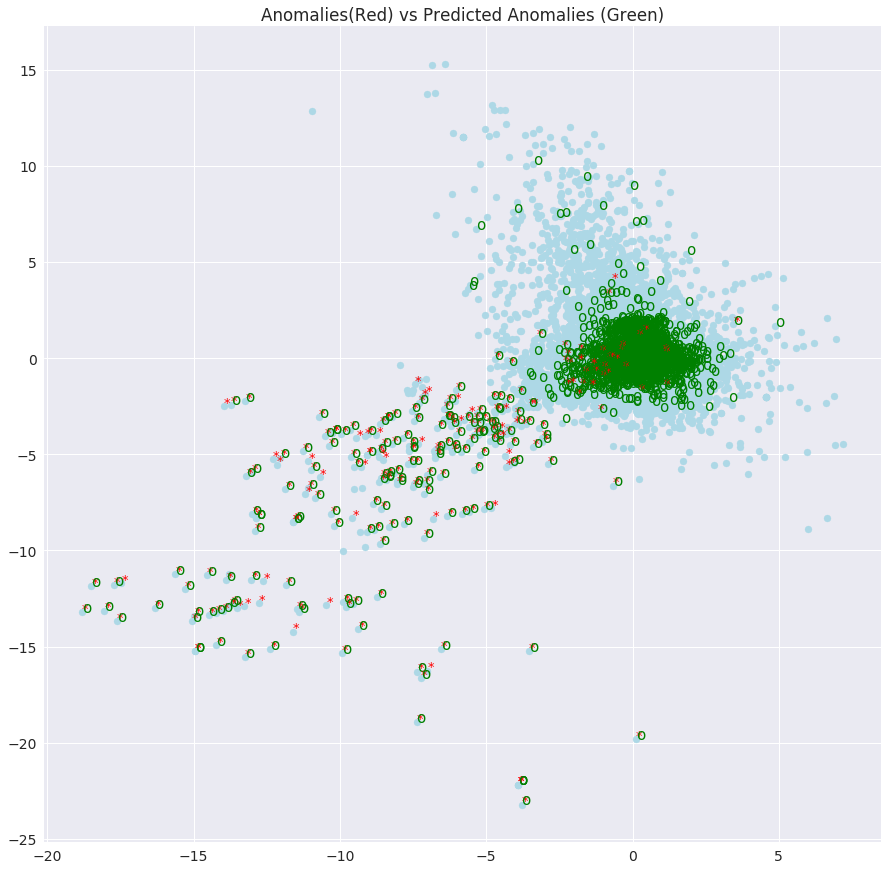

In [197]:
# Same Scatter Plotting on IsolationForest model

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(df_test['V14'], df_test['V10'], marker="o", color="lightBlue")
ax.set_title('Anomalies(Red) vs Predicted Anomalies (Green)')
for i, txt in enumerate(df_test['V14'].index):
    if df_test_Y.loc[txt] == 1:
        ax.annotate('*', (df_test['V14'].loc[txt], df_test['V10'].loc[txt]), fontsize=13, color='Red')
    if prediction_class[i] == 1:
        ax.annotate('o', (df_test['V14'].loc[txt], df_test['V10'].loc[txt]), fontsize=15, color='Green')

## Reference

PWC, Global Economic Crime and Fraud Survey, 2018, https://www.pwc.com/gx/en/forensics/global-economic-crime-and-fraud-survey-2018.pdf

Kartik Nighania, Various ways to evaluate a machine learning model’s performance, 30 Dec 2018, 
https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15 

Shruti Saxena, Precision vs Recall, 15 May 2018, https://towardsdatascience.com/precision-vs-recall-386cf9f89488

Fei Tony Liu, 2019, Isolation Forest, https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf

In [ ]:
# Try Pipeline
# . I worked on this dataset using Isolation Forest. Maybe you could add a ROC curve

# from sklearn.metrics import accuracy_score
# accuracy_score(labels_test,pred)